<a href="https://colab.research.google.com/github/FelipeFerAl/SignalProcessing/blob/main/Consulta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONSULTA**
Qué pasa en la forma matricial cuando se cambia el tamaño de la matriz, la entrada es una señal (vector)?

Cuando analizamos Fourier, el tamaño de la matriz generada depende del número de muestras deseado para nuestra señal de análisis.

A mayor número de muestras, mayor será la resolución o calidad de la señal resultante, aumentando la precisión de la transformada. Sin embargo, un número desmedido de muestras puede generar una carga computacional innecesaria.

Para el caso opuesto, al reducir la dimensión, hay mayor velocidad de procesamiento de los datos mientras se sacrifica la calidad de la señal resultante, perdiendo muestras e información en el proceso.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
T = 1
t = np.linspace(0, T, fs, endpoint=False)

f1, f2 = 20, 50
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.random.randn(len(t))

freqs = np.fft.fftfreq(len(signal), 1/fs)
spectrum_original = np.fft.fft(signal)

factor_reduccion = 10
signal_reducida = signal[::factor_reduccion]

fs_reducida = fs / factor_reduccion
freqs_reducida = np.fft.fftfreq(len(signal_reducida), 1/fs_reducida)
spectrum_reducido = np.fft.fft(signal_reducida)

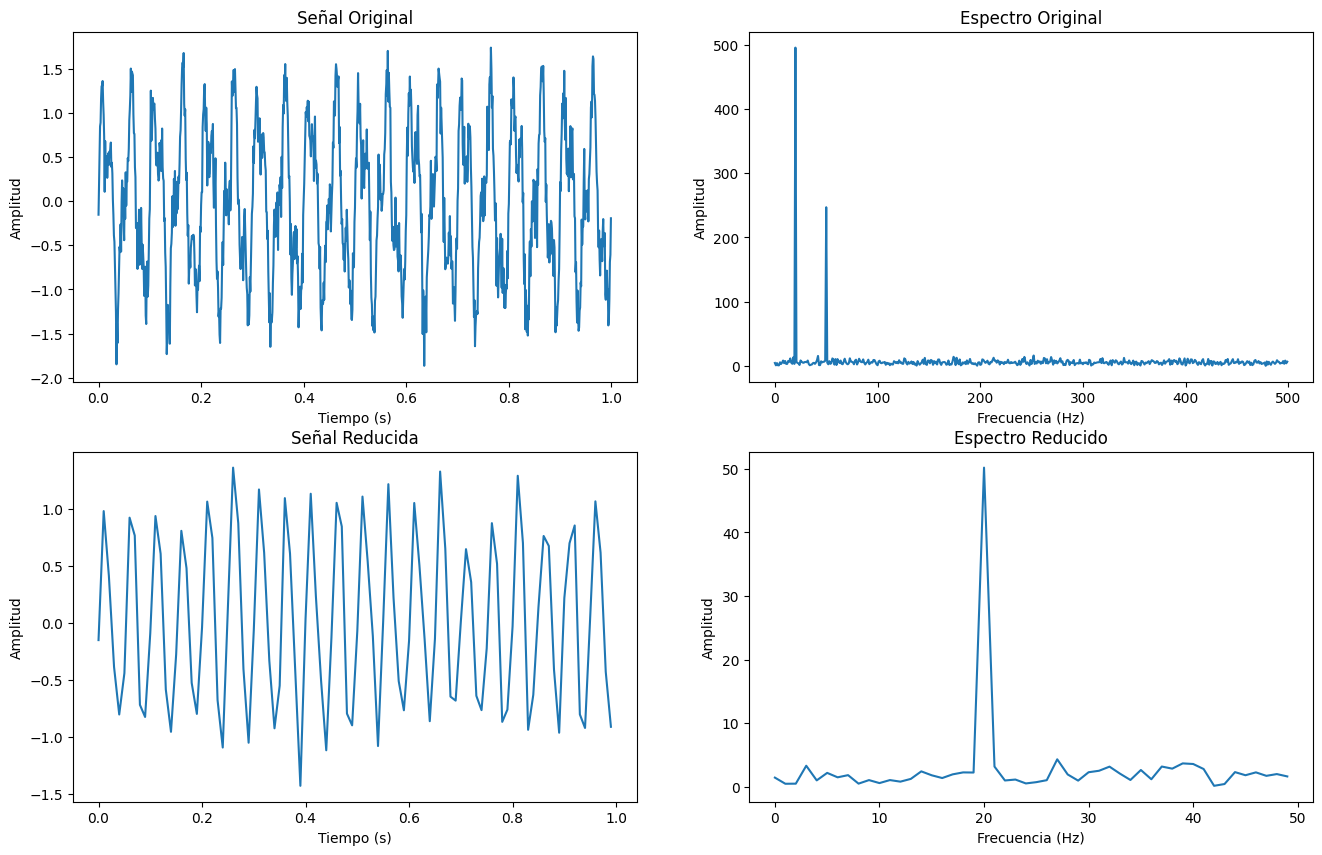

In [25]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.plot(t, signal), plt.title('Señal Original'), plt.xlabel('Tiempo (s)'), plt.ylabel('Amplitud')
plt.subplot(2,2,2)
plt.plot(freqs[:len(freqs)//2], np.abs(spectrum_original[:len(freqs)//2])), plt.title('Espectro Original'), plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud')
plt.subplot(2,2,3)
plt.plot(t[::factor_reduccion], signal_reducida), plt.title('Señal Reducida'), plt.xlabel('Tiempo (s)'), plt.ylabel('Amplitud')
plt.subplot(2,2,4)
plt.plot(freqs_reducida[:len(freqs_reducida)//2], np.abs(spectrum_reducido[:len(freqs_reducida)//2])), plt.title('Espectro Reducido'), plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud')
plt.show()